# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

*Notes:* 

- Solve the questions with python.

- Round the final answer to three decimal places.

In [10]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import math

## Bernoulli's Distribution

In a basket containing 100 fruits, there are 60 apples and 40 oranges. 

A fruit is picked randomly from the basket. 

1. **What is the probability that the fruit is apple?**
1. **What is the probability that it is an orange?**

Proportion of apples: 0.60
Proportion of oranges: 0.40
Bernoulli Distribution for Apples: <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x10f3eaa50>
Bernoulli Distribution for Oranges: <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x10ee15310>
Mean of Apples: 0.60
Variance of Apples: 0.24
Mean of Oranges: 0.40
Variance of Oranges: 0.24


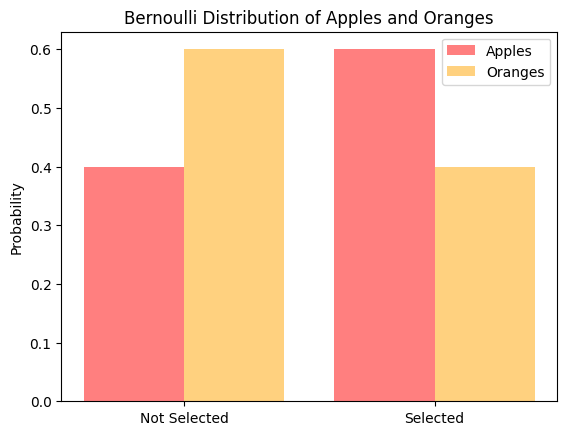

In [ ]:
apples = 60
oranges = 40
total_fruits = 100

# Calculate the proportion of apples and oranges
p_apples = apples / total_fruits
p_oranges = oranges / total_fruits
print(f"Proportion of apples: {p_apples:.2f}")
print(f"Proportion of oranges: {p_oranges:.2f}")

# Calculate the Bernoullis distribution for apples
bernoulli_apples = stats.bernoulli(p_apples) # statistics.bernoulli
print(f"Bernoulli Distribution for Apples: {bernoulli_apples}")

# Calculate the Bernoullis distribution for oranges
bernoulli_oranges = stats.bernoulli(p_oranges)
print(f"Bernoulli Distribution for Oranges: {bernoulli_oranges}")

# Calculate the mean and variance for apples
mean_apples = bernoulli_apples.mean()
var_apples = bernoulli_apples.var()
print(f"Mean of Apples: {mean_apples:.2f}")
print(f"Variance of Apples: {var_apples:.2f}")

# Calculate the mean and variance for oranges
mean_oranges = bernoulli_oranges.mean()
var_oranges = bernoulli_oranges.var()
print(f"Mean of Oranges: {mean_oranges:.2f}")
print(f"Variance of Oranges: {var_oranges:.2f}")

# Plot the Bernoulli distributions
x = [0, 1]
y_apples = bernoulli_apples.pmf(x) # Probability mass function
y_oranges = bernoulli_oranges.pmf(x) # Probability mass function
plt.bar(x, y_apples, alpha=0.5, label='Apples', color='red', width=0.4, align='center')
plt.bar([i + 0.4 for i in x], y_oranges, alpha=0.5, label='Oranges', color='orange', width=0.4, align='center')
plt.xticks([0.2, 1.2], ['Not Selected', 'Selected'])
plt.ylabel('Probability')
plt.title('Bernoulli Distribution of Apples and Oranges')
plt.legend()
plt.show()








Now we take a random sample of 20 fruits from the basket. After each fruit is taken, a new fruit of the same type is replaced in the basket. Therefore, every time we are taking 1 fruit from 100 fruits. 

1. **What is the probability that the first 5 fruits are all apples?**

1. **What is the probability that the first 5 fruits are all apples and the next 15 fruits are all oranges?**

You can include the `p` and `q` probabilities you previous calculated in your solution.

In [3]:
# Previous probabilities
p = 0.6  # probability of apple
q = 0.4  # probability of orange

# 1. Probability that first 5 fruits are all apples
prob_5_apples = p ** 5
print(f"Probability of 5 apples: {prob_5_apples}")

# 2. Probability that first 5 are apples and next 15 are oranges
prob_5_apples_15_oranges = (p ** 5) * (q ** 15)
print(f"Probability of 5 apples then 15 oranges: {prob_5_apples_15_oranges}")


Probability of 5 apples: 0.07775999999999998
Probability of 5 apples then 15 oranges: 8.349416423424006e-08


## Binomial Distribution

Similar to the above problem, this time again we randomly sample 20 fruits.

**What is the probability that this time the sample contains 5 apples and 15 oranges?**

Please note that this time the order of the fruits being picked does not matter.

In [ ]:
# Probabilities
p = 0.6  # probability of apple
q = 0.4  # probability of orange

# Sample size
n = 20
# Number of apples we want
k = 5

# Binomial probability formula: C(n,k) * p^k * q^(n-k)
prob_5_apples_15_oranges = comb(n, k) * (p ** k) * (q ** (n - k))

print(f"Probability of 5 apples and 15 oranges (any order): {prob_5_apples_15_oranges}")

Probability of 5 apples and 15 oranges (any order): 0.0012944935222876579


In the lesson we also discussed CDF (cumulative distribution function). In the context of the above problem, **what is the probability that less than 5 fruits picked are apples?**

Write the formula and calculate the probability below.

In [6]:
# Probabilities
p = 0.6  # probability of apple
q = 0.4  # probability of orange
n = 20

# P(X < 5) = P(X = 0) + P(X = 1) + P(X = 2) + P(X = 3) + P(X = 4)
# Formula: P(X = k) = C(n,k) * p^k * q^(n-k)

prob_less_than_5 = 0

for k in range(5):  # k = 0, 1, 2, 3, 4
    prob_k = comb(n, k) * (p ** k) * (q ** (n - k))
    prob_less_than_5 += prob_k
    print(f"P(X = {k}) = {prob_k}")

print(f"\nP(X < 5) = {prob_less_than_5}")

P(X = 0) = 1.0995116277760013e-08
P(X = 1) = 3.2985348833280036e-07
P(X = 2) = 4.700412208742404e-06
P(X = 3) = 4.230370987868163e-05
P(X = 4) = 0.00026968615047659537

P(X < 5) = 0.00031703112116863


<!-- **Plot the PDF (probability distributiom function) for the above binomial distribution.** -->

**Plot the Probability Mass Function (PMF) for the above binomial distribution.**

*Hint: The range of x in a binomial distribution is from `0` to `n`.*

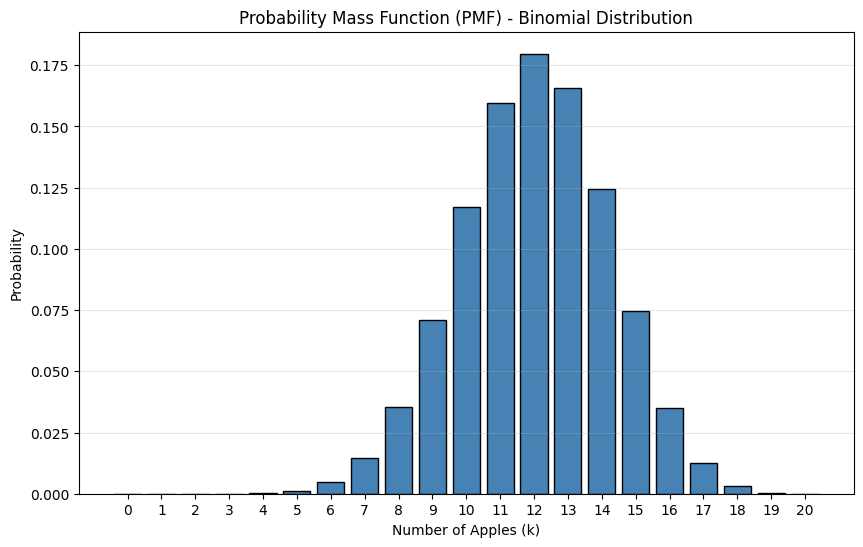

In [7]:
# Probabilities
p = 0.6  # probability of apple
q = 0.4  # probability of orange
n = 20

# Calculate PMF for all possible values (0 to n)
x_values = range(n + 1)  # 0 to 20
pmf_values = []

for k in x_values:
    prob_k = comb(n, k) * (p ** k) * (q ** (n - k))
    pmf_values.append(prob_k)

# Plot PMF
plt.figure(figsize=(10, 6))
plt.bar(x_values, pmf_values, color='steelblue', edgecolor='black')
plt.xlabel('Number of Apples (k)')
plt.ylabel('Probability')
plt.title('Probability Mass Function (PMF) - Binomial Distribution')
plt.xticks(x_values)
plt.grid(axis='y', alpha=0.3)
plt.show()

## Poisson Distribution

In this challenge you are required to use the Math library in python to solve the problems.

In the UEFA champions league tournament, the average number of goals scored in a match is 2.3. 

**What is the probability that the number of goals scored in a match is 5?**

*Hint: Use the exp() in the math library*

And to calculate the factorial, you can use the following code:

```python
import math
math.factorial(n) # n is the number you want to find the factorial of
```

In [ ]:
import math

# poisson distribution
lambda_goals = 2.3 # average number of goals per match
k=5 # number of goals we want to find the probability for   

# Poisson formula: P(X = k) = (lambda^k * e^(-lambda)) / k!
poisson_prob = (math.exp(-lambda_goals) * (lambda_goals ** k)) / math.factorial(k)
print(f"Probability of scoring {k} goals: {poisson_prob:.4f}")      

Probability of scoring 5 goals: 0.0538


**Draw a poisson probability distribution plot for the number of goals to be between 0 to 10.**

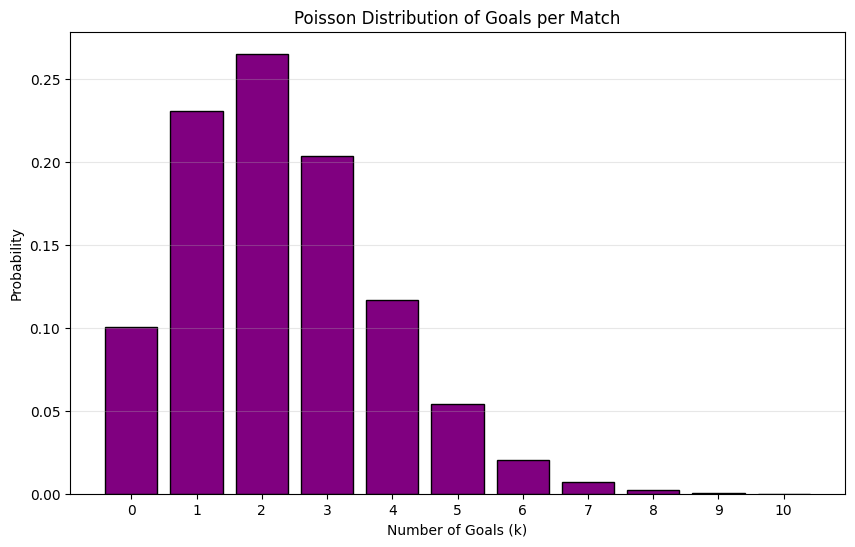

In [ ]:
# poisson distribution plot for tht no of goals to be b/w o to 10
lambda_goals = 2.3
x_values = range(11)  # 0 to 10 goals
poisson_pmf = [ (math.exp(-lambda_goals) * (lambda_goals ** k)) / math.factorial(k) for k in x_values ] 

# Please label the axes and give a title to the plot 
plt.figure(figsize=(10, 6))
plt.bar(x_values, poisson_pmf, color='purple', edgecolor='black')
plt.xlabel('Number of Goals (k)')
plt.ylabel('Probability')
plt.title('Poisson Distribution of Goals per Match')
plt.xticks(x_values)
plt.grid(axis='y', alpha=0.3)
plt.show()  
